## EDA

In [161]:
!pip install seaborn
!pip install pyarrow
!pip install wordcloud
!pip install nltk


In [162]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

import json

from matplotlib.patches import Rectangle


import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to C:\Users\Bodine
[nltk_data]     Stubbé\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Reading the data

In [163]:

data_file = 'C:/Users/Bodine Stubbé/mlvu_2024/ML_2024/data/Sarcasm_Headlines_Dataset_v2.json'

def parse_json(fname):
    data = []
    with open(fname, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

data = parse_json(data_file)

df = pd.DataFrame(data)
df.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


Check if there are missing values

In [164]:
#no missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [165]:
df.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

Class distribution

In [166]:
class_counts = round(df["is_sarcastic"].value_counts(normalize=True)*100,0)

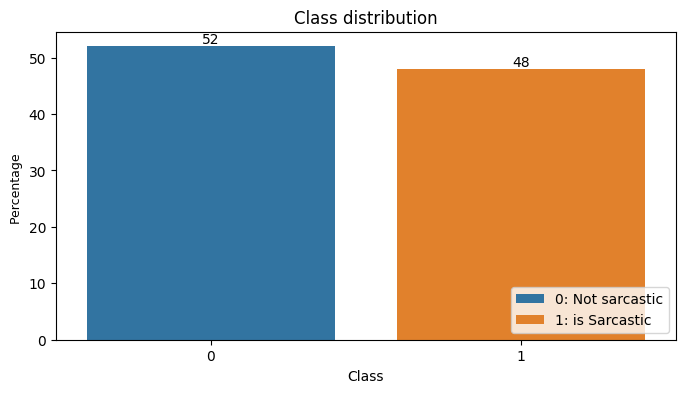

In [167]:
plt.figure(figsize=(8,4))



ax = sns.barplot( x = class_counts.index, y = class_counts.values, hue = class_counts.index)
legend_labels = ['0: Not sarcastic', '1: is Sarcastic']
legend_handles, _ = ax.get_legend_handles_labels()
ax.legend(handles=legend_handles, labels =legend_labels,loc = "lower right")

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Class distribution")
plt.ylabel("Percentage ", size = 9)
plt.xlabel("Class")
plt.show()

Add number of character, number of words and average word lenght for each headline

In [168]:
#add a column num_chars (number of characters)
df["total_num_chars"] = df['headline'].apply(len)
#add a column num_words (number of words)
df["num_words"] = df['headline'].apply(lambda x: len(str(x).split()))
#add a column avg_word_length (average word length)
df["avg_word_length"] = df['headline'].apply(lambda x: sum(len(word) for word in str(x).split()) / len(str(x).split()) if len(str(x).split()) > 0 else 0)


In [169]:
df.describe()

,is_sarcastic,total_num_chars,num_words,avg_word_length
count,28619.000000,28619.000000,28619.000000,28619.000000
mean,0.476397,62.308571,10.049967,5.391303
std,0.499451,20.726483,3.388307,0.973804
min,0.000000,7.000000,2.000000,2.333333
25%,0.000000,49.000000,8.000000,4.727273
50%,0.000000,62.000000,10.000000,5.300000
75%,1.000000,75.000000,12.000000,6.000000
max,1.000000,926.000000,151.000000,13.333333


In [170]:
#headline with max number of words
df[df['num_words'] == df['num_words'].max()].iloc[:, 1]

7302    hot wheels ranked number one toy for rolling d...
Name: headline, dtype: object

In [171]:
#headline with min number of words
df[df['num_words'] == df['num_words'].min()]["headline"]

269           trump's tailspin
489             sunday roundup
859                life unfair
1168                 cher back
1225             clean machine
                 ...          
27565    celebrating christmas
27935           sunday roundup
28094        chaps unnecessary
28376                  bye bye
28571            refugee blues
Name: headline, Length: 118, dtype: object

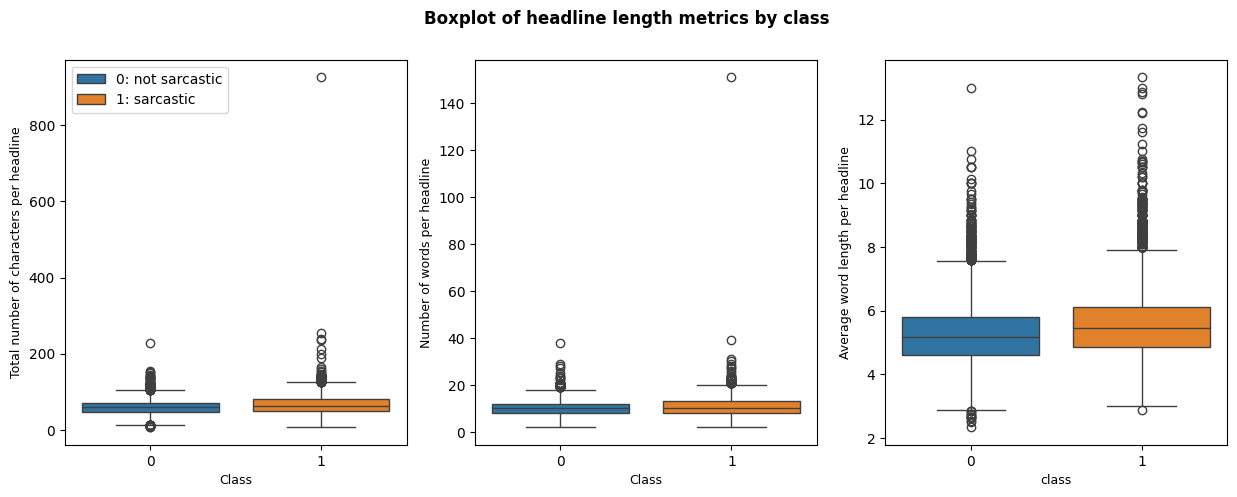

In [172]:


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x='is_sarcastic', y="total_num_chars", data=df, hue="is_sarcastic", ax=axs[0])
handles, _ = axs[0].get_legend_handles_labels()
axs[0].legend(handles, ['0: not sarcastic', '1: sarcastic'])

sns.boxplot(x='is_sarcastic', y="num_words", data=df, hue="is_sarcastic", ax=axs[1])
axs[1].get_legend().remove()

sns.boxplot(x='is_sarcastic', y="avg_word_length", data=df, hue="is_sarcastic", ax=axs[2])
axs[2].get_legend().remove()


axs[0].set_ylabel('Total number of characters per headline', size= 9)
axs[0].set_xlabel('Class', size= 9)

axs[1].set_ylabel('Number of words per headline', size= 9)
axs[1].set_xlabel('Class', size= 9)

axs[2].set_ylabel('Average word length per headline', size= 9)
axs[2].set_xlabel('class', size= 9)

plt.suptitle('Boxplot of headline length metrics by class', weight='bold')
plt.tight_layout
plt.show()

Worclouds

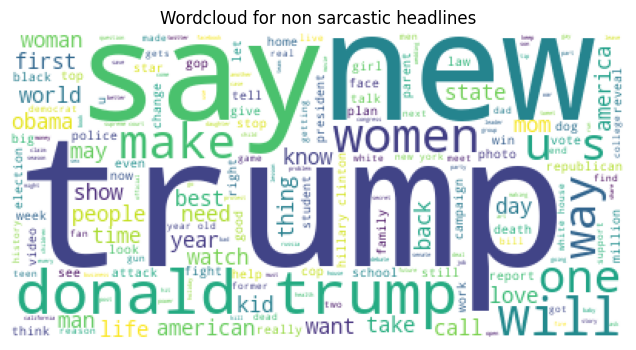

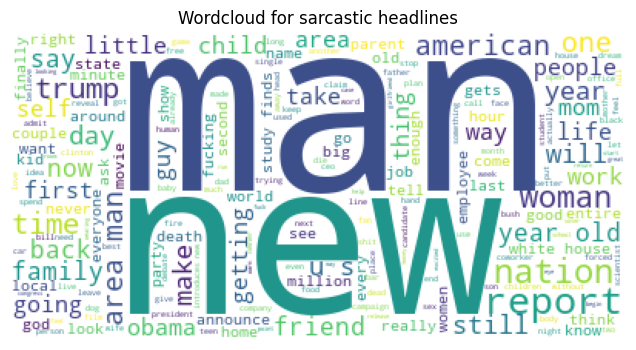

In [173]:

from wordcloud import WordCloud
df.head()
non_sarcasm = df[df["is_sarcastic"] == 0]["headline"]
sarcasm = df[df["is_sarcastic"] == 1]["headline"]

#Non sarcastic wordcloud
fig = plt.figure(figsize=(12,4))
wordlcoud_non_sarcasm = WordCloud(background_color = "white").generate(" ".join(non_sarcasm))

plt.title("Wordcloud for non sarcastic headlines")
plt.imshow(wordlcoud_non_sarcasm)
plt.axis("off")
plt.show()

#Non sarcastic wordcloud
fig = plt.figure(figsize=(12,4))
wordlcoud_sarcasm = WordCloud(background_color = "white").generate(" ".join(sarcasm))

plt.title("Wordcloud for sarcastic headlines")
plt.imshow(wordlcoud_sarcasm)
plt.axis("off")
plt.show()

In [174]:
df.duplicated().sum()

2

In [175]:
df.drop_duplicates(inplace = True)

## Cleaning text

In [176]:
#we will only use headline and label

df = df[["headline", "is_sarcastic"]]

In [177]:
def clean_text(text):
    #lowercase all headlines
    text = text.lower()

   # delete punctuation marks and special characters
    text = re.sub(r'[^\w\s]', '', text).strip()

    # remove stopwords
    stop_words = set(stopwords.words('english'))
    text = " ".join(word for word in text.split() if word not in stop_words)

    # delete digits and words containing digits
    text = re.sub(r'\b\w*\d\w*\b', '', text).strip()
    return text


def lemmatize(text):
    lemmatizer = nltk.WordNetLemmatizer()
    text = lemmatizer.lemmatize(text)

    return text

def pre_process_text(text):
    
    return lemmatize(clean_text(text))


In [178]:
clean_text("eat veggies: 9deli99ciously game57 different recipes")

'eat veggies   different recipes'

In [179]:
df["headline"] = df["headline"].apply(pre_process_text)

In [180]:
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep totally nails congress falling short g...,0
2,eat veggies deliciously different recipes,0
3,inclement weather prevents liar getting work,1
4,mother comes pretty close using word streaming...,1


## Saving new data

In [181]:
df.to_csv("data/processed_data.csv")